<a href="https://colab.research.google.com/github/Priyabrat845/Credit-Card-Default-Prediction-/blob/main/Credit_Card_Default_Prediction_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objective**

## To predict the chances of Credit Card Default made by the Client.

## **Data Description**

## Attribute Information:

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## **Importing Libraries**

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 3.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491617 sha256=b00811a7bbb6a8134bad14779ac4e3faaf6e5ac72811c9e44253578f35b450ab
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  roc_auc_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from plotnine import *
import plotly.express as pe
import shap
import warnings
warnings.filterwarnings('ignore')

## **Importing Data**

In [ ]:
dataset1=pd.read_excel('https://raw.githubusercontent.com/Rahul711sharma/Credit-Card-Default-/main/default%20of%20credit%20card%20clients.xls')
dataset1.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [ ]:
dataset=pd.read_excel('https://raw.githubusercontent.com/Rahul711sharma/Credit-Card-Default-/main/default%20of%20credit%20card%20clients.xls',header=1)
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
dataset.rename(columns={'default payment next month':'Default payment'},inplace=True)
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
dataset.shape

(30000, 25)

This dataset contains 25 features and 3000 observations.

In [ ]:
# Let's explore the various features present in this dataset.
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default payment'],
      dtype='object')

In [ ]:
dataset.isna().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
Default payment    0
dtype: int64

From the above we can see that there is no NULL values to remove.

## **Exploratory Data Analysis**

In [ ]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   LIMIT_BAL        30000 non-null  int64
 2   SEX              30000 non-null  int64
 3   EDUCATION        30000 non-null  int64
 4   MARRIAGE         30000 non-null  int64
 5   AGE              30000 non-null  int64
 6   PAY_0            30000 non-null  int64
 7   PAY_2            30000 non-null  int64
 8   PAY_3            30000 non-null  int64
 9   PAY_4            30000 non-null  int64
 10  PAY_5            30000 non-null  int64
 11  PAY_6            30000 non-null  int64
 12  BILL_AMT1        30000 non-null  int64
 13  BILL_AMT2        30000 non-null  int64
 14  BILL_AMT3        30000 non-null  int64
 15  BILL_AMT4        30000 non-null  int64
 16  BILL_AMT5        30000 non-null  int64
 17  BILL_AMT6        30000 non-null  int64
 18  PAY_AM

In [ ]:
dataset['Default payment'].value_counts()

0    23364
1     6636
Name: Default payment, dtype: int64

The dataset contains a very less amount of default payment observations as compared to the non-default payment observations.

In [ ]:
# Function to find distinct Values

def distinct_values(data):
  for i in data.columns:
    #distinct values with less than 30 unique values
    if len(set(list(data[i])))<30:
      print(f"{i} Distinct Values :  \n {data[i].value_counts()} \n")

In [ ]:
distinct_values(dataset)

SEX Distinct Values :  
 2    18112
1    11888
Name: SEX, dtype: int64 

EDUCATION Distinct Values :  
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64 

MARRIAGE Distinct Values :  
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64 

PAY_0 Distinct Values :  
  0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64 

PAY_2 Distinct Values :  
  0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64 

PAY_3 Distinct Values :  
  0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64 

PAY_4 Distinct Values :  
  0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       3

In [ ]:
# Core Categorical Data
Cat_data = ['SEX','EDUCATION','MARRIAGE','Default payment']

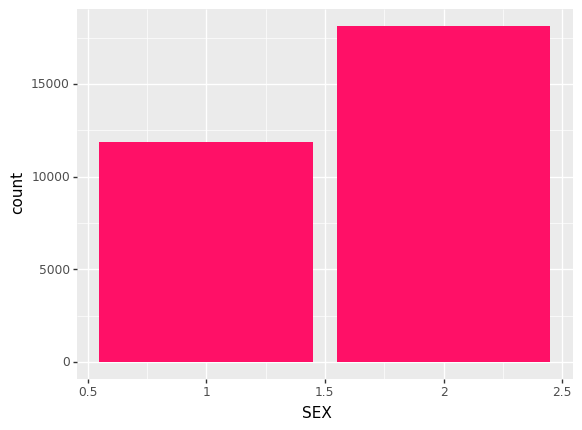

<ggplot: (8789568879901)>


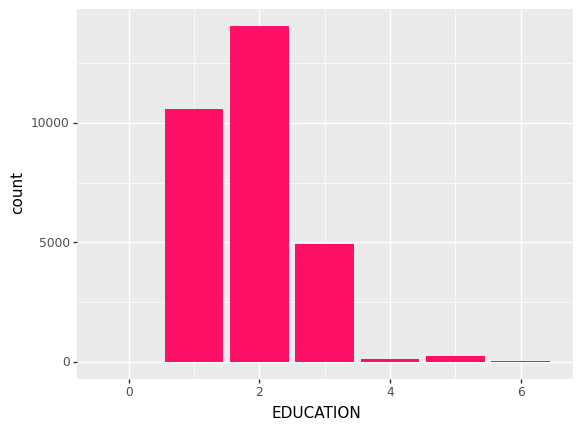

<ggplot: (8789576249929)>


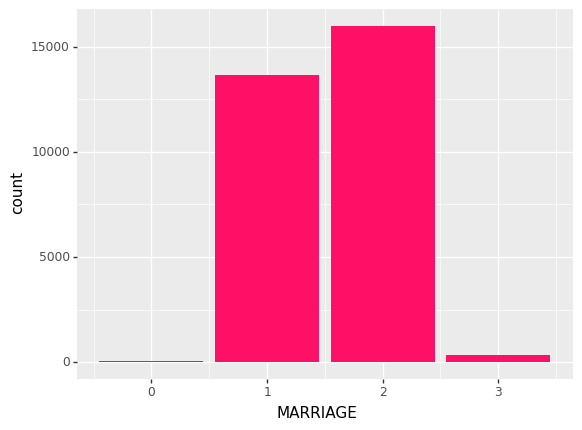

<ggplot: (8789571547361)>


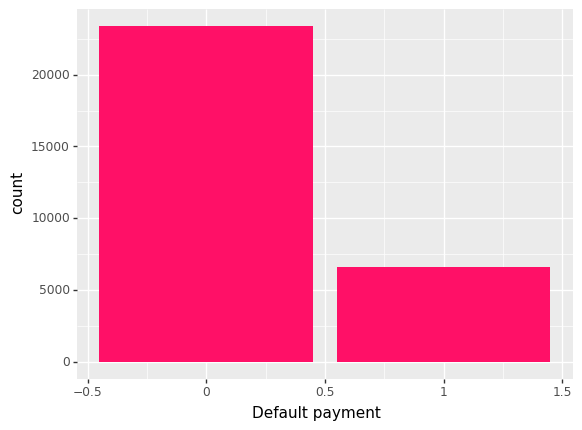

<ggplot: (8789571445057)>


In [ ]:
# Bar graphs
for i in Cat_data:
  print(ggplot(dataset)+aes(i,color=i)+geom_bar(fill = "#FF1067"))


### **Treatment of classes with close to 0 observations. We either remove them or add them to nearest majority class.**

In [ ]:
# Replacing the sex groups to reduce bias or data insufficiency.
dataset['SEX']= dataset['SEX'].replace({1:0,2:1})
dataset['SEX'].value_counts()

1    18112
0    11888
Name: SEX, dtype: int64

In [ ]:
dataset['MARRIAGE']=dataset['MARRIAGE'].replace({3:1,2:1,1:0})


In [ ]:
dataset['MARRIAGE'].value_counts()

1    16287
0    13713
Name: MARRIAGE, dtype: int64

In [ ]:
#Education (0 = graduate school; 1 = university; 2 = high school).
dataset['EDUCATION'] = dataset['EDUCATION'].replace({1:0,2:1,3:2,4:2,5:2,6:2})
dataset['EDUCATION'].value_counts()

1    14030
0    10599
2     5371
Name: EDUCATION, dtype: int64

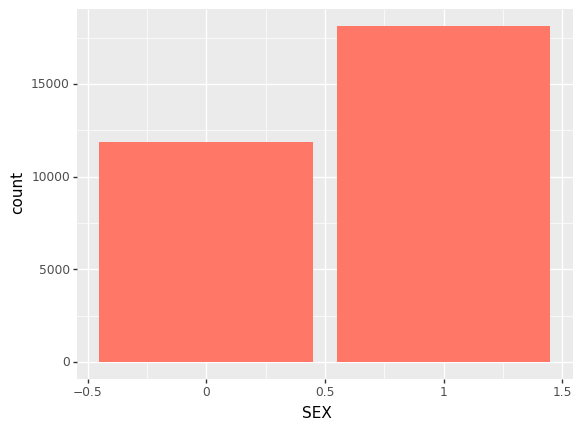

<ggplot: (8789571415689)>


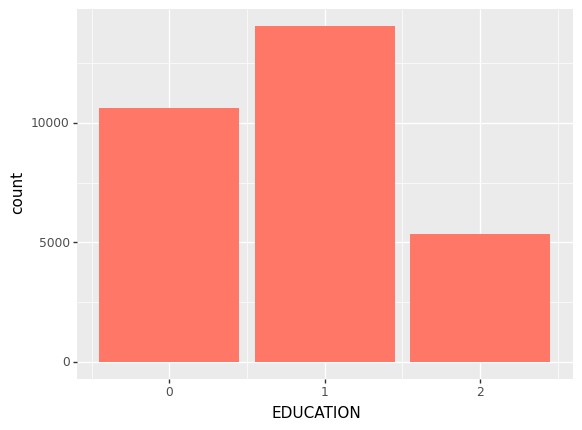

<ggplot: (8789568878709)>


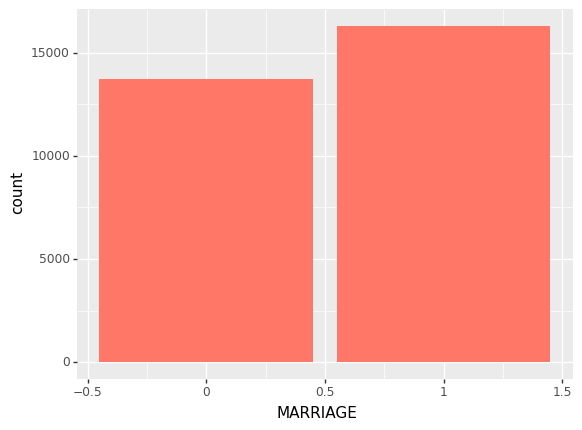

<ggplot: (8789571396217)>


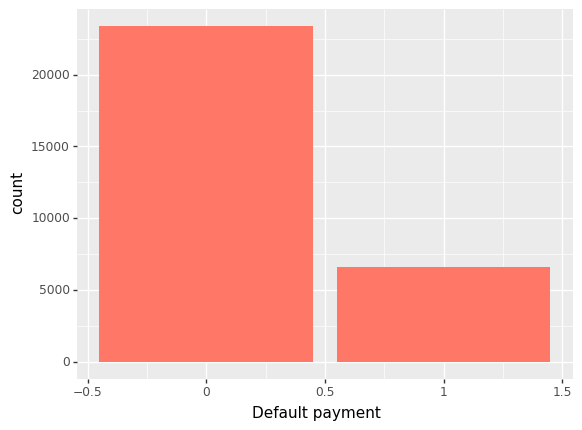

<ggplot: (8789571420481)>


In [ ]:
# Bar graphs
for i in Cat_data:
  print(ggplot(dataset)+aes(i,color=i)+geom_bar(fill = "#FF7767"))


We can see that our dependent variable has a majority class. We need to pick model and algorithms complying to that in future.

### **Education by Gender**

In [ ]:
Education_by_gender = pd.pivot_table(dataset,index='EDUCATION',columns='SEX',aggfunc={'SEX':'count'})
Education_by_gender

SEX      
SEX           0     1
EDUCATION            
0          4362  6237
1          5374  8656
2          2152  3219

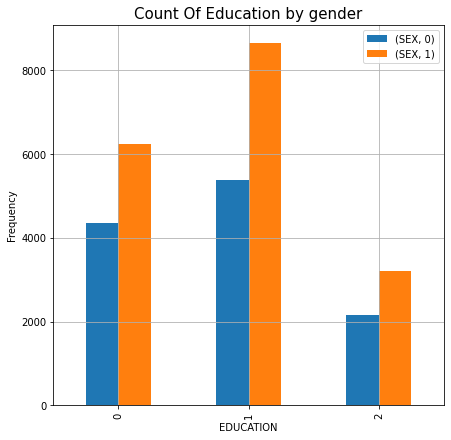

In [ ]:
Education_by_gender.plot(kind='bar',figsize=(7,7),grid=1)
plt.title("Count Of Education by gender",size=15)
plt.ylabel('Frequency')
plt.legend()

We can see in the above chart that people with University level education are heightest in numbers.

### **People who defaulted groups in diffrent categories:**

In [ ]:
# Default by education
Default_by_education = pd.DataFrame(pd.pivot_table(dataset,index='EDUCATION',columns='Default payment',aggfunc={'Default payment':'count'}))
Default_by_education

Default payment      
Default payment               0     1
EDUCATION                            
0                          8563  2036
1                         10700  3330
2                          4101  1270

Text(0.5, 1.0, 'Count of People who defaulted by education')

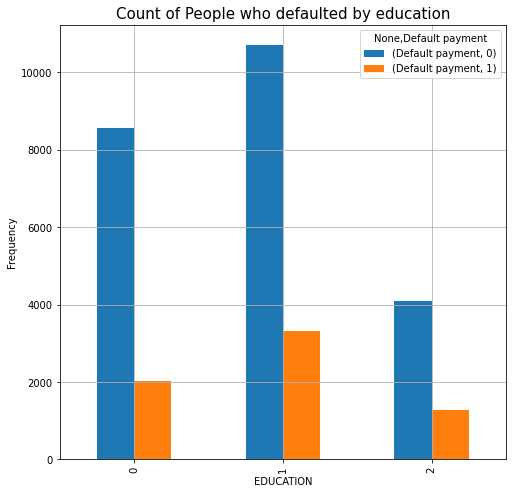

In [ ]:
Default_by_education.plot(kind='bar',y= ['Default payment'],stacked=0,figsize=(8,8),grid=1)
plt.ylabel('Frequency')
plt.title('Count of People who defaulted by education',size=15)

In [ ]:
# Default by gender
Default_by_gender = pd.DataFrame(pd.pivot_table(dataset,index='SEX',columns='Default payment',aggfunc={'Default payment':'count'}))
Default_by_gender

Default payment      
Default payment               0     1
SEX                                  
0                          9015  2873
1                         14349  3763

Text(0.5, 1.0, 'Count of People who defaulted by gender')

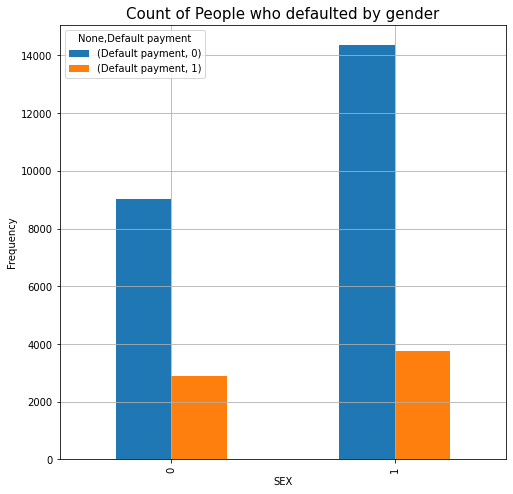

In [ ]:
Default_by_gender.plot(kind='bar',y= ['Default payment'],stacked=0,figsize=(8,8),grid=1)
plt.ylabel('Frequency')
plt.title('Count of People who defaulted by gender',size=15)

### **AGE Distribution**

In [ ]:
from scipy.stats import mode
mode_age = int(mode(dataset['AGE'])[0])

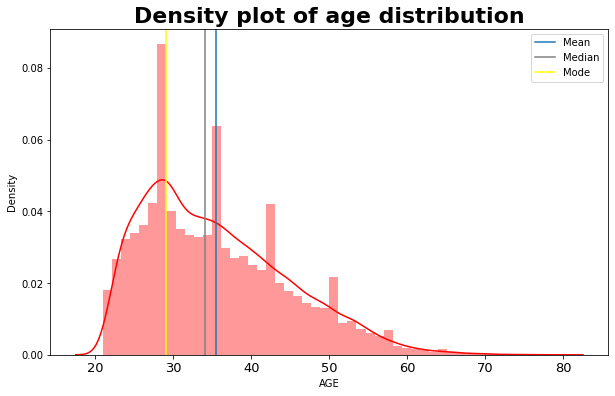

In [ ]:
plt.figure(figsize=(10,6))
plt.rc('xtick', labelsize=13) 
sns.distplot(dataset['AGE'],color='red')
plt.title('Density plot of age distribution',{'size':22,'weight':'bold'})
plt.axvline(np.mean(dataset['AGE']),label='Mean')
plt.axvline(np.median(dataset['AGE']),color='grey',label='Median')
plt.axvline(mode_age,color='yellow',label='Mode')
plt.legend()

* We can see that it is a **right skewed** distribution.



* Even after trying square root transformation and log transformation it didn't come close to normal distribution

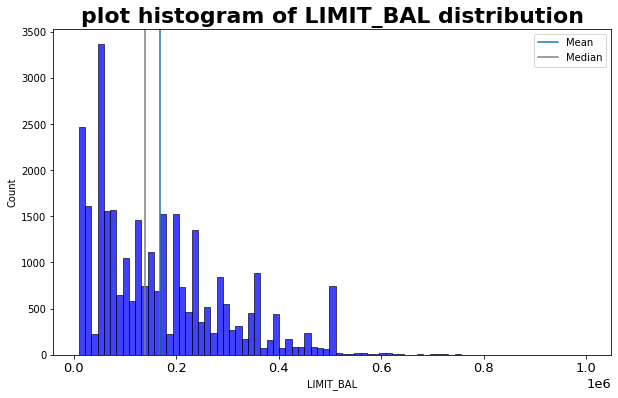

In [ ]:
plt.figure(figsize=(10,6))
plt.rc('xtick', labelsize=13) 
sns.histplot(dataset['LIMIT_BAL'],color='blue')
plt.title('plot histogram of LIMIT_BAL distribution',{'size':22,'weight':'bold'})
plt.axvline(np.mean(dataset['LIMIT_BAL']),label='Mean')
plt.axvline(np.median(dataset['LIMIT_BAL']),color='grey',label='Median')
plt.legend()

Text(0.5, 1.0, 'Age for not default Next Month')

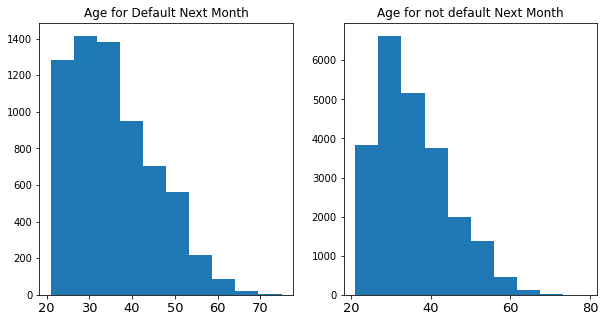

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
Default = dataset[dataset['Default payment']==1]
Not_default = dataset[dataset['Default payment']==0]
fig,axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(Default['AGE'])
axes[0].set_title("Age for Default Next Month")
axes[1].hist(Not_default['AGE'])
axes[1].set_title("Age for not default Next Month")


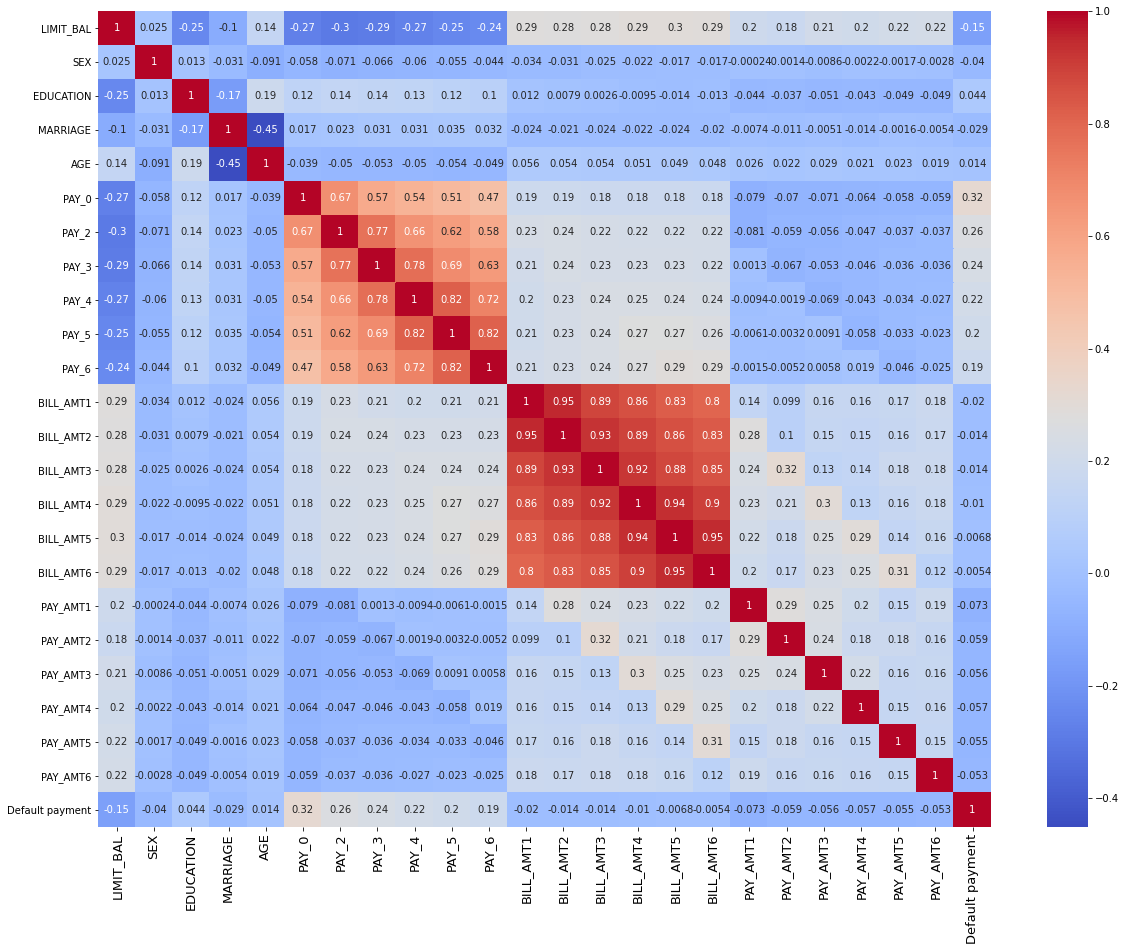

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.iloc[:,1:].corr(),annot=True,cmap="coolwarm")


## **Machine Learning Model**

In [ ]:
# Train and test split of the dataset.
x=dataset.drop(['Default payment','ID'],axis=1)
y=dataset['Default payment']
x.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,1,1,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,1,1,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,1,1,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000


In [ ]:
# Let's do the training & testing split of our dataset.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print('Shape of x training dataset:',x_train.shape)
print('Shape of x testing dataset:',x_test.shape)
print('Shape of y training dataset:',y_train.shape)
print('Shape of y testing dataset:',y_test.shape)

Shape of x training dataset: (22500, 23)
Shape of x testing dataset: (7500, 23)
Shape of y training dataset: (22500,)
Shape of y testing dataset: (7500,)


### **Logistic Regression Model**

In [ ]:
lg=LogisticRegression(max_iter=10000)
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train,lg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     17491
           1       0.00      0.00      0.00      5009

    accuracy                           0.78     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.60      0.78      0.68     22500



In [ ]:
y_pred_train=lg.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.7772888888888889

In [ ]:
y_pred_test=lg.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.7830666666666667

From the above we can see that. The accuracy of the Logistic Regression model is not upto mark.

### **Decision Tree** 

In [ ]:
dt= DecisionTreeClassifier(class_weight="balanced")
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
accuracy_score(y_test,dt.predict(x_test))

0.7378666666666667

From the above we can see that, the accuracy of the **Decision Tree** model is close to **Logistic Regression** model.

In [ ]:
def feature_importances(model,train_data):
  df=pd.DataFrame({'Features':train_data.columns, 'scores': model.feature_importances_}).sort_values('scores',ascending=0)
  plt.figure(figsize=(8,8))
  sns.barplot(df['scores'],df['Features'])
  plt.title(f"Feature Importance Graph")

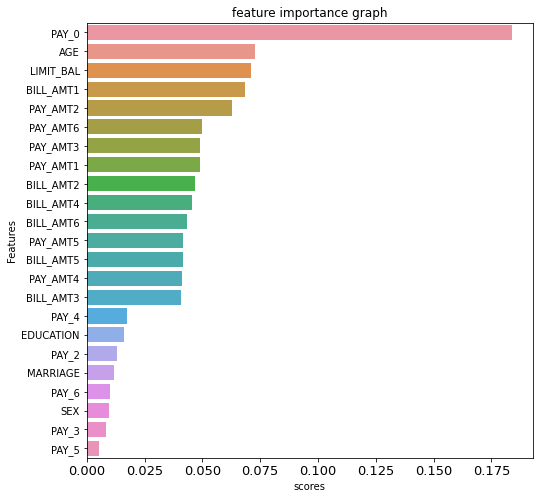

In [ ]:
feature_importances(dt,x_train)

### **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gboost = GradientBoostingClassifier()
gboost.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
accuracy_score(y_train,gboost.predict(x_train))

0.8268444444444445

In [ ]:
accuracy_score(y_test,gboost.predict(x_test))

0.8196

From the above we can see that, the **Gradient Boosting Classifier** is able to perform will as compared to the **Decision Tree** & **Logistic Regression** model.

In [ ]:
from sklearn.model_selection import GridSearchCV

#number of trees
n_estimators = [100,120]

#Maximum depth of tree
max_depth = [6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


In [ ]:
gboost2= GradientBoostingClassifier()
gb_grid =GridSearchCV(estimator=gboost2, param_grid = param_dict,cv = 5, verbose=2)
gb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  15.1s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.1s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  15.0s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  15.0s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  15.0s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  15.0s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  18.0s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  18.0s
[CV] max_depth=6, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 25.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [ ]:
accuracy_score(y_train,gb_grid.predict(x_train))

In [ ]:
accuracy_score(y_test,gb_grid.predict(x_test))

0.8194666666666667

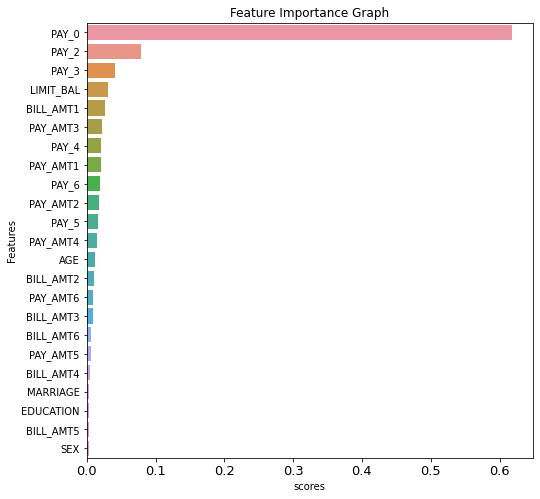

In [ ]:
feature_importances(gboost,x_train)

Through the Gradient Boosting grid search, the accuracy is close to Gradient Boosting classifier.

###XGBoost classifier

In [ ]:
import xgboost
xgb = xgboost.XGBClassifier(max_depth=10,)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
accuracy_score(y_train,xgb.predict(x_train))

0.9202666666666667

In [ ]:
accuracy_score(y_test,xgb.predict(x_test))

0.8162666666666667

Form the above we can clearly see that, the XGBoost is over fitting the training dataset and the accuracy on the test dataset is close to the other models i.e Gradient Boosting. 

In [ ]:
features = pd.DataFrame(list(zip(xgb.feature_importances_,x.columns)),columns=['Score','Features'])
features=features.sort_values('Score',ascending=False)

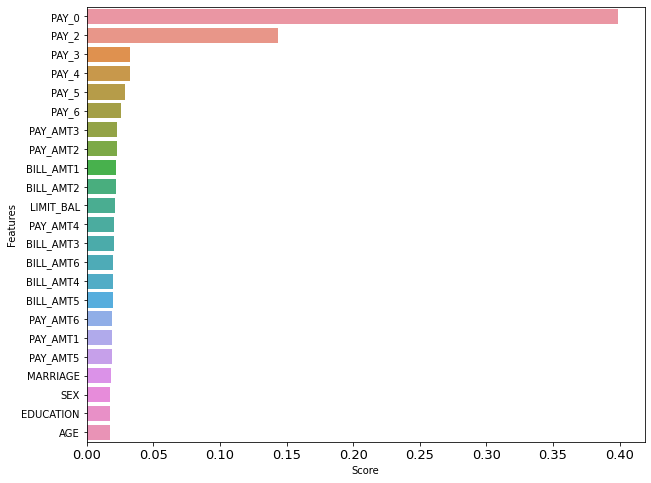

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=features['Score'],y=features['Features'])

From the above graph we can see that, the PAY_0 & PAY_1 are the most important features with feature importance socre of 0.35 & 0.14 respectively.

##ROC AUC Curve

In [ ]:
from sklearn.metrics import roc_curve
#roc Scores on test data

#roc curve for logistic regression
fpr_log,tpr_log,thresh_log =roc_curve(y_test,lg.predict_proba(x_test)[:,1],pos_label=1)

#roc curve for decision tree

fpr_dt,tpr_dt,thresh_dt =roc_curve(y_test,dt.predict_proba(x_test)[:,1],pos_label=1)

#roc curve for random Forest

fpr_rf,tpr_rf,thresh_rf =roc_curve(y_test,gboost.predict_proba(x_test)[:,1],pos_label=1)

# roc curve for gredient boost 

fpr_gb,tpr_gb,thresh_gb =roc_curve(y_test,xgb.predict_proba(x_test)[:,1],pos_label=1)

# roc curve for fpr=tpr

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

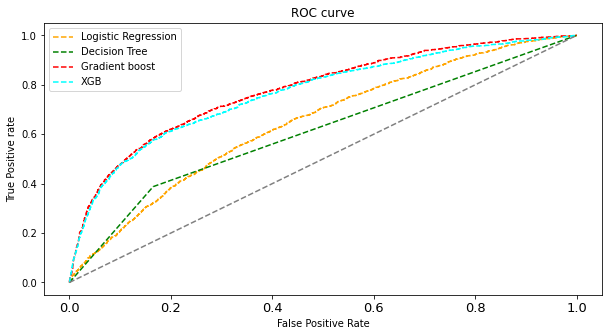

In [ ]:
plt.plot(fpr_log, tpr_log, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='red', label='Gradient boost')
plt.plot(fpr_gb, tpr_gb, linestyle='--',color='cyan', label='XGB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='grey')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()

##Model Interpretation

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(gb_boost_with_best_perams,x_train)
shap_value = explainer(x_train)

 99%|===================| 22317/22500 [02:00<00:00]       

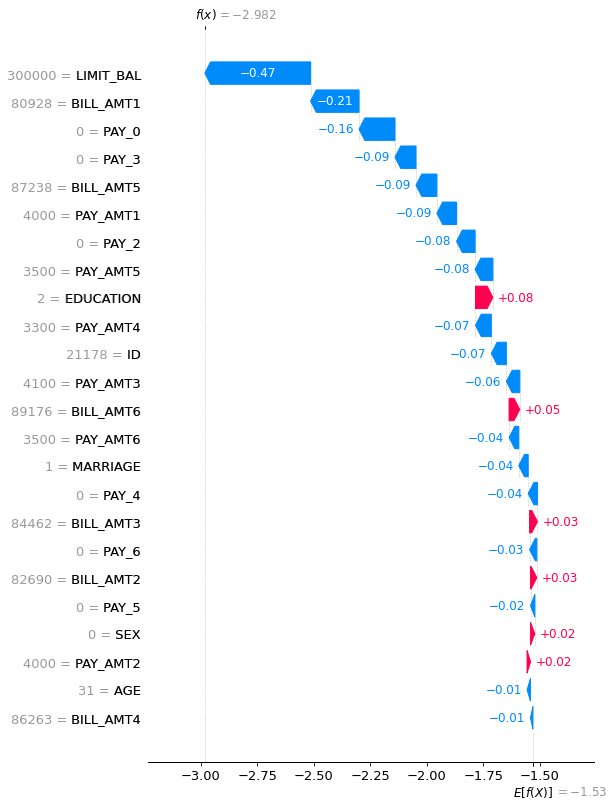

In [ ]:
shap.plots.waterfall(shap_value[0],max_display=50)

Waterfall plots are designed to display explanations for individual predictions.

The bottom of a waterfall plot starts as the expected value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

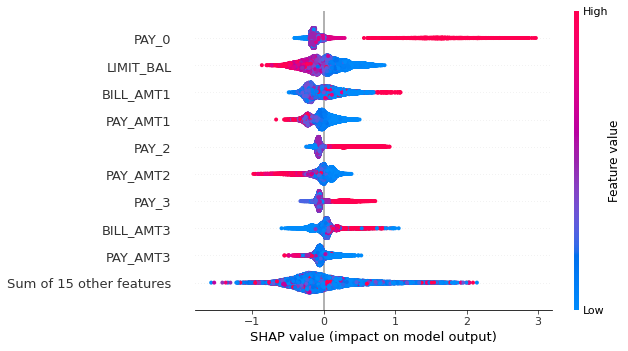

In [ ]:
shap.plots.beeswarm(shap_value)

The beeswarm plot is designed to display an information-dense summary of how the top features in a dataset impact the model’s output.

The x position of the dot is determined by the SHAP value (shap_values.value[instance,feature]) of that feature, and dots “pile up” along each feature row to show density.

Color is used to display the original value of a feature (shap_values.data[instance,feature]).

In the plot above we can see that **PAY_0** is the most important feature on average.

In [ ]:
shap.initjs()
shap.plots.force(shap_value[0])

features pushing the prediction higher are shown in **red**, those pushing the prediction lower are in **blue**.

## **Conclusions**

* Data categorical variables had minority classes which were added to their closest majority class
* People who studied the higher University education defaulted the most.
* People who had an University level education were most in the numbers.
* There were not huge gap but female clients tended to default the most.
* Labels of the data were imbalanced and had a significant difference.
* Logistic regression Accuracy were 78% on test data. It over-fitted with 1% with respect to train accuracy.
* Gradient boost gave the highest accuracy of 82% on test dataset.
* Repayment in the month of september i.e ``pay_0`` tended to be the most important feature for our machine learning model.